<h1 align="center">Exploratory Data Analysis</h1>


# Imports


In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data


In [2]:
base_path = "npy_files"

images_path = os.path.join(base_path, "images.npy")
images_gt_path = os.path.join(base_path, "images_gt.npy")
images_density_path = os.path.join(base_path, "images_density.npy")
labels_path = os.path.join(base_path, "labels.npy")

In [3]:
images = np.load(images_path)
images_gt = np.load(images_gt_path, allow_pickle=True)
images_density = np.load(images_density_path)
labels = np.load(labels_path)

# Basic information


In [4]:
print("Count of images:", len(images))

Count of images: 2000


In [5]:
print("Shape of images:", images[0].shape)

Shape of images: (480, 640, 3)


# Plot sample image


In [6]:
idx = 200

## Without ground truth


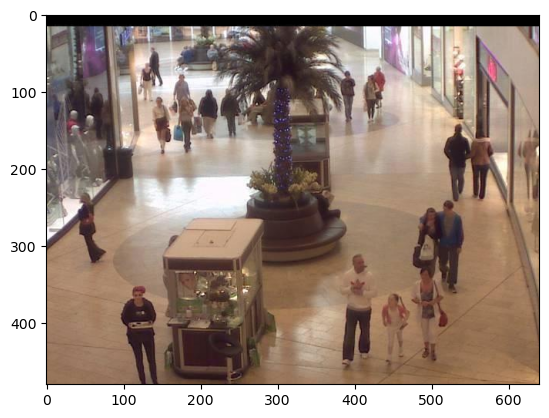

In [7]:
plt.imshow(images[idx])

## With ground truth & labels


In [8]:
print(f"Ground truth coordinates for image {idx}\n", images_gt[idx])

Ground truth coordinates for image 200
 [[141.38794926  45.65856237]
 [133.26955603  68.99894292]
 [184.00951374  42.6141649 ]
 [191.11310782  44.64376321]
 [213.43868922  43.62896406]
 [230.69027484  43.62896406]
 [175.89112051  81.17653277]
 [149.50634249 111.6205074 ]
 [180.96511628 114.66490486]
 [211.40909091 104.51691332]
 [237.79386892 101.47251586]
 [268.23784355  99.44291755]
 [292.59302326  93.35412262]
 [393.05813953  80.16173362]
 [417.41331924  84.22093023]
 [433.65010571  76.102537  ]
 [534.11522199 148.15327696]
 [564.55919662 156.27167019]
 [522.95243129 250.64799154]
 [502.6564482  257.75158562]
 [495.55285412 335.89112051]
 [449.88689218 376.48308668]
 [409.294926   321.68393235]
 [115.00317125 362.27589852]
 [ 49.04122622 241.51479915]
 [345.36257928 227.30761099]]


Label for image 200: 26


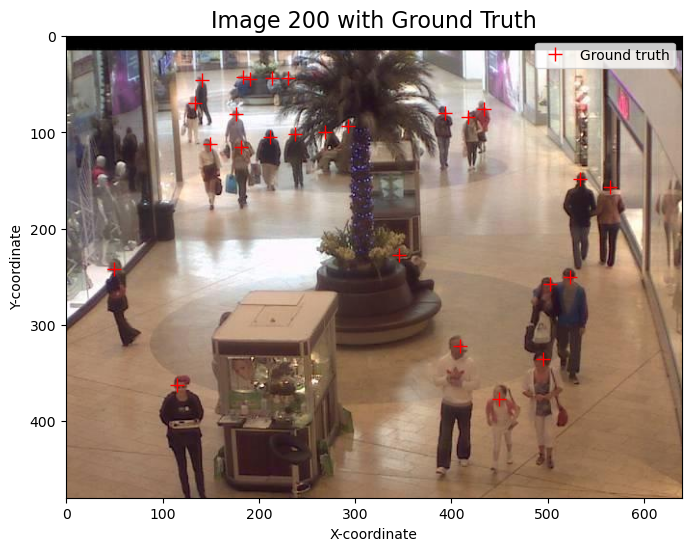

In [9]:
print(f"Label for image {idx}:", labels[idx])
plt.figure(figsize=(8,6))
plt.imshow(images[idx])
plt.plot(
    images_gt[idx][:, 0],
    images_gt[idx][:, 1],
    'r+',
    markersize=10,
    label="Ground truth"
)
plt.title(f"Image {idx} with Ground Truth", fontsize=16)
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(loc="upper right")
plt.show()

## With density map


Number of people: 26.00


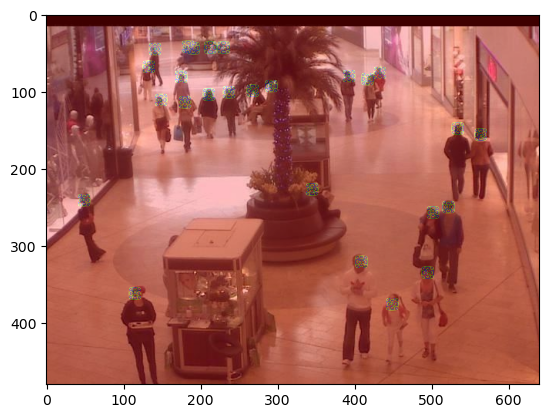

In [10]:
plt.imshow(images[idx])
plt.imshow(images_density[idx], 
           cmap='prism', 
           interpolation='bicubic', 
           alpha=0.25)
print(f"Number of people: {np.sum(images_density[idx]):.2f}")
plt.show()

# Basic information & visualization of the labels


In [11]:
labels_df = pd.DataFrame(labels)

In [12]:
labels_df.describe()

,0
count,2000.000000
mean,31.157500
std,6.945417
min,13.000000
25%,26.000000
50%,31.000000
75%,36.000000
max,53.000000


<Figure size 800x600 with 0 Axes>

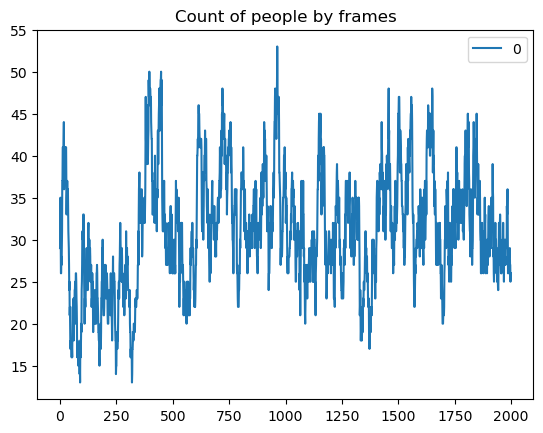

In [13]:
plt.figure(figsize=(8,6))
labels_df.plot()
plt.title("Count of people by frames")
plt.show()

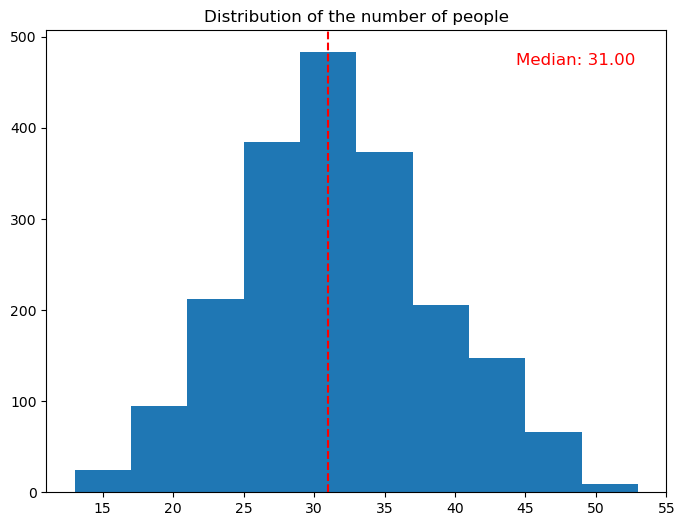

In [22]:
plt.figure(figsize=(8,6))
median = np.median(labels_df)
plt.hist(labels_df)
plt.axvline(median, color='r', linestyle='--')
plt.text(0.95, 0.95, f'Median: {median:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title("Distribution of the number of people")
plt.show()